In [34]:
from collections import defaultdict
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.adj = defaultdict(list)
        
    def addEdge(self, u, v):
        self.adj[u].append(v)
        
    def printGraph(self):
        for i in range(self.V):
            print( i, "->", self.adj[i])
            
    def dfs(self):
        visited = [0]*self.V
        
        def dfsUtil(node):
            visited[node] = 1
            print(node)
            
            for neighbor in self.adj[node]:
                if visited[neighbor] == 0:
                    dfsUtil(neighbor)
                    
        for i in range(self.V):
            if visited[i] == 0:
                dfsUtil(i)
                
    def bfs(self):
        visited = [0]*self.V
        
        def bfsUtil(node):
            
            queue = [node]
            while queue:
                
                curr = queue.pop(0)
                visited[curr] = 1
                print(curr)
                
                for neighbor in self.adj[curr]:
                    if visited[neighbor] == 0:
                        queue.append(neighbor)
                        
        
        for i in range(self.V):
            if visited[i] == 0:
                bfsUtil(i)
       

In [37]:
g = Graph(7)
g.addEdge(0, 1)
g.addEdge(0, 2)
g.addEdge(1, 3)
g.addEdge(1, 4)
g.addEdge(2, 5)
g.addEdge(2, 6)



In [38]:
g.dfs()

0
1
3
4
2
5
6


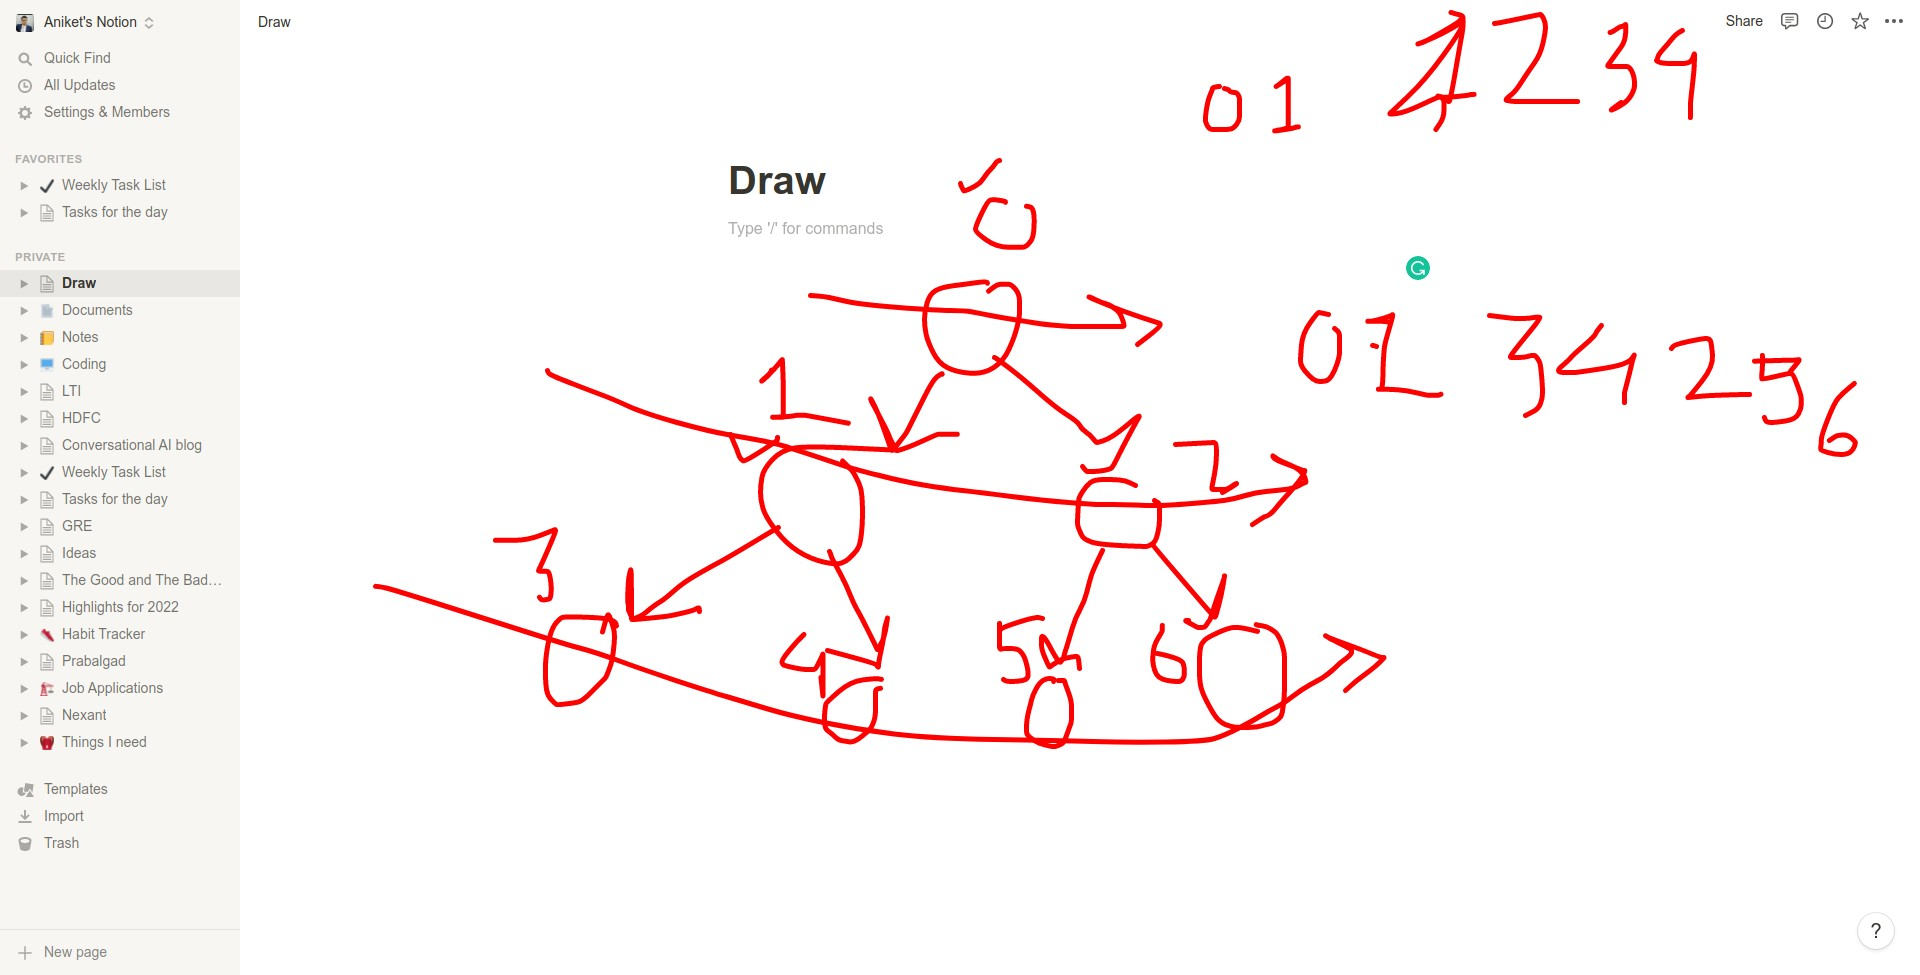

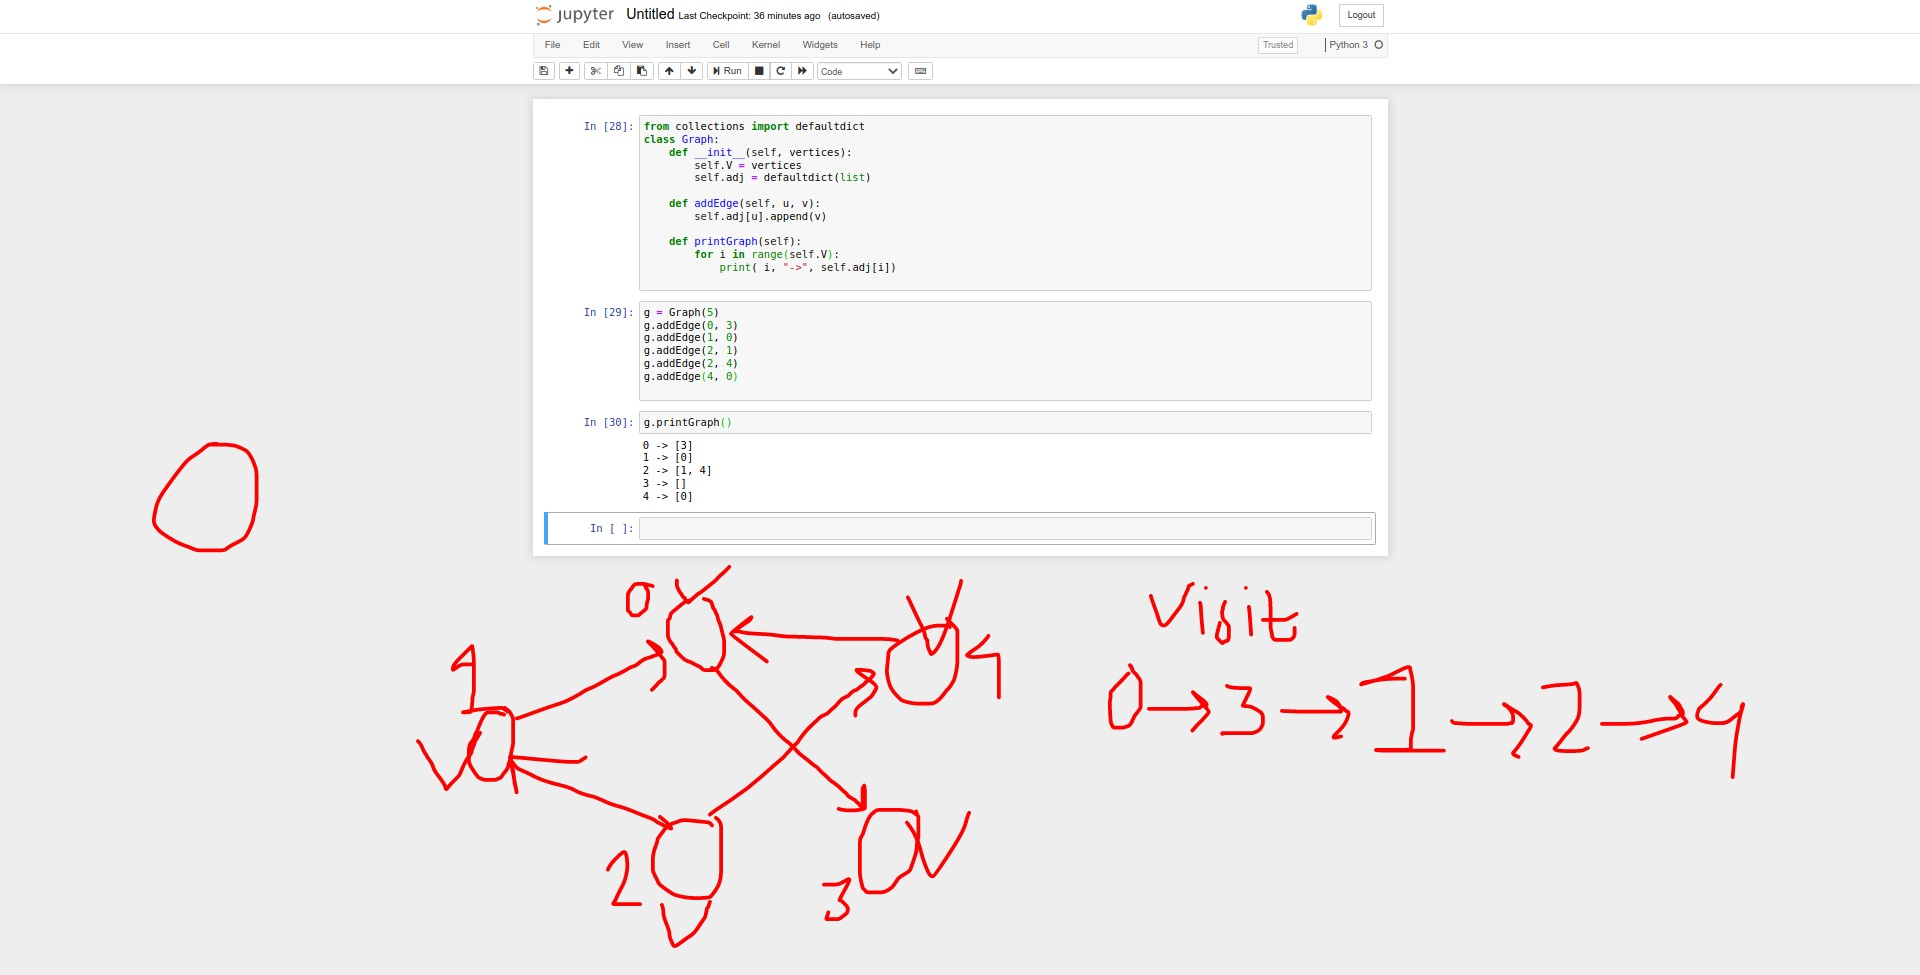

In [10]:
def valid_pos(x, y, row, col):
    if 0 <= x <= row-1:
        if 0 <= y <= col-1:
            return True

    return False

def bfs(lake, arr, visited):
    for i in range(len(lake)):
        queue = []
        queue.append(lake[i])
        visited[lake[i][1][0]][lake[i][1][1]] = 1

    while queue:
        curr_val, curr_pos = queue.pop(0)
        for next_pos in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            next_i, next_j = (curr_pos[0]+next_pos[0]), (curr_pos[1]+next_pos[1])
            if valid_pos(next_i, next_j,len(arr), len(arr[0])) and visited[next_i][next_j] == 0:
                next_val = arr[next_i][next_j]
                if next_val >= curr_val:
                    queue.append((next_val,(next_i, next_j)))
                    visited[next_i][next_j] += 1




def solve(A):
    blue_lake = []
    red_lake = []

    for i in range(len(A)):
        for j in range(len(A[0])):
            if i == 0 or j == 0:
                blue_lake.append((A[i][j],(i, j)))
            if i == len(A)-1 or j == len(A[0])-1:
                red_lake.append((A[i][j],(i, j)))

            
                
    visited_blue = [[0]*len(A[0]) for _ in range(len(A))]
    visited_red = [[0]*len(A[0]) for _ in range(len(A))]
    bfs(red_lake, A, visited_red)
    bfs(blue_lake, A, visited_blue)

    res = 0
    print(visited_blue)
    print(visited_red)
    for i in range(len(A)):
        for j in range(len(A[0])):
            if visited_blue[i][j] and visited_red[i][j]:
                res += 1

    return res


A = [
       [1, 2, 2, 3, 5],
       [3, 2, 3, 4, 4],
       [2, 4, 5, 3, 1],
       [6, 7, 1, 4, 5],
       [5, 1, 1, 2, 4],
     ]

print(solve(A))


2
